# VisMCAO: Actuator Study
The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and wave-front error (WFE) for the acutator count trade study. 
* Radius vs. Strehl
* Radius vs. FWHM
* Radius vs. EE80
* Radius vs. WFE
* Actuator vs. PSF Metrics (1000 nm) and WFE (center)

## Setup

In [1]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from astropy.io import fits
import os, fnmatch
import importlib
from bpeck.mcao import act_study
import readbin

## Parameters 

In [2]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] #nanometer

bandpass = 3
seed = 1

%matplotlib inline

## Get data from directories 
Currently, this is hardcoded into the jupyter notebook code. These are the directories under consideration
* 2000actuators, 3000actuators, 4000actuators, 5000actuators

Change as needed with other actuator count numbers.

### 2000 actuators 

In [3]:
os.chdir("2000actuators")

In [4]:
#PSF metrics
mets_2000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_2000, y_2000, w_2000, strehl_2000, fwhm_g_2000, fwhm_e_2000, r_ee50_2000, r_ee80_2000 = mets_2000

In [5]:
#WFE
wfe_2000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_2000, clos_mean_nm_2000, open_xx_mean_nm_2000, clos_xx_mean_nm_2000 = wfe_2000

In [6]:
os.chdir("..")

### 3000 actuators 

In [7]:
os.chdir("3000actuators")

In [8]:
#PSF metrics
mets_3000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_3000, y_3000, w_3000, strehl_3000, fwhm_g_3000, fwhm_e_3000, r_ee50_3000, r_ee80_3000 = mets_3000

In [9]:
#WFE
wfe_3000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_3000, clos_mean_nm_3000, open_xx_mean_nm_3000, clos_xx_mean_nm_3000 = wfe_3000

In [10]:
os.chdir("..")

### 4000 actuators

In [29]:
os.chdir("4000actuators")

In [30]:
#PSF metrics
mets_4000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_4000, y_4000, w_4000, strehl_4000, fwhm_g_4000, fwhm_e_4000, r_ee50_4000, r_ee80_4000 = mets_4000

In [31]:
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors = ["r", "g", "b"]

results_xx_file = f'extra/Resp_{seed}.bin'
results_xx = readbin.readbin(results_xx_file)

open_mean_nm, clos_mean_nm, open_xx_mean_nm, clos_xx_mean_nm = act_study.get_wfe_metrics(seed=1)

n_psf = clos_xx_mean_nm.shape[0]

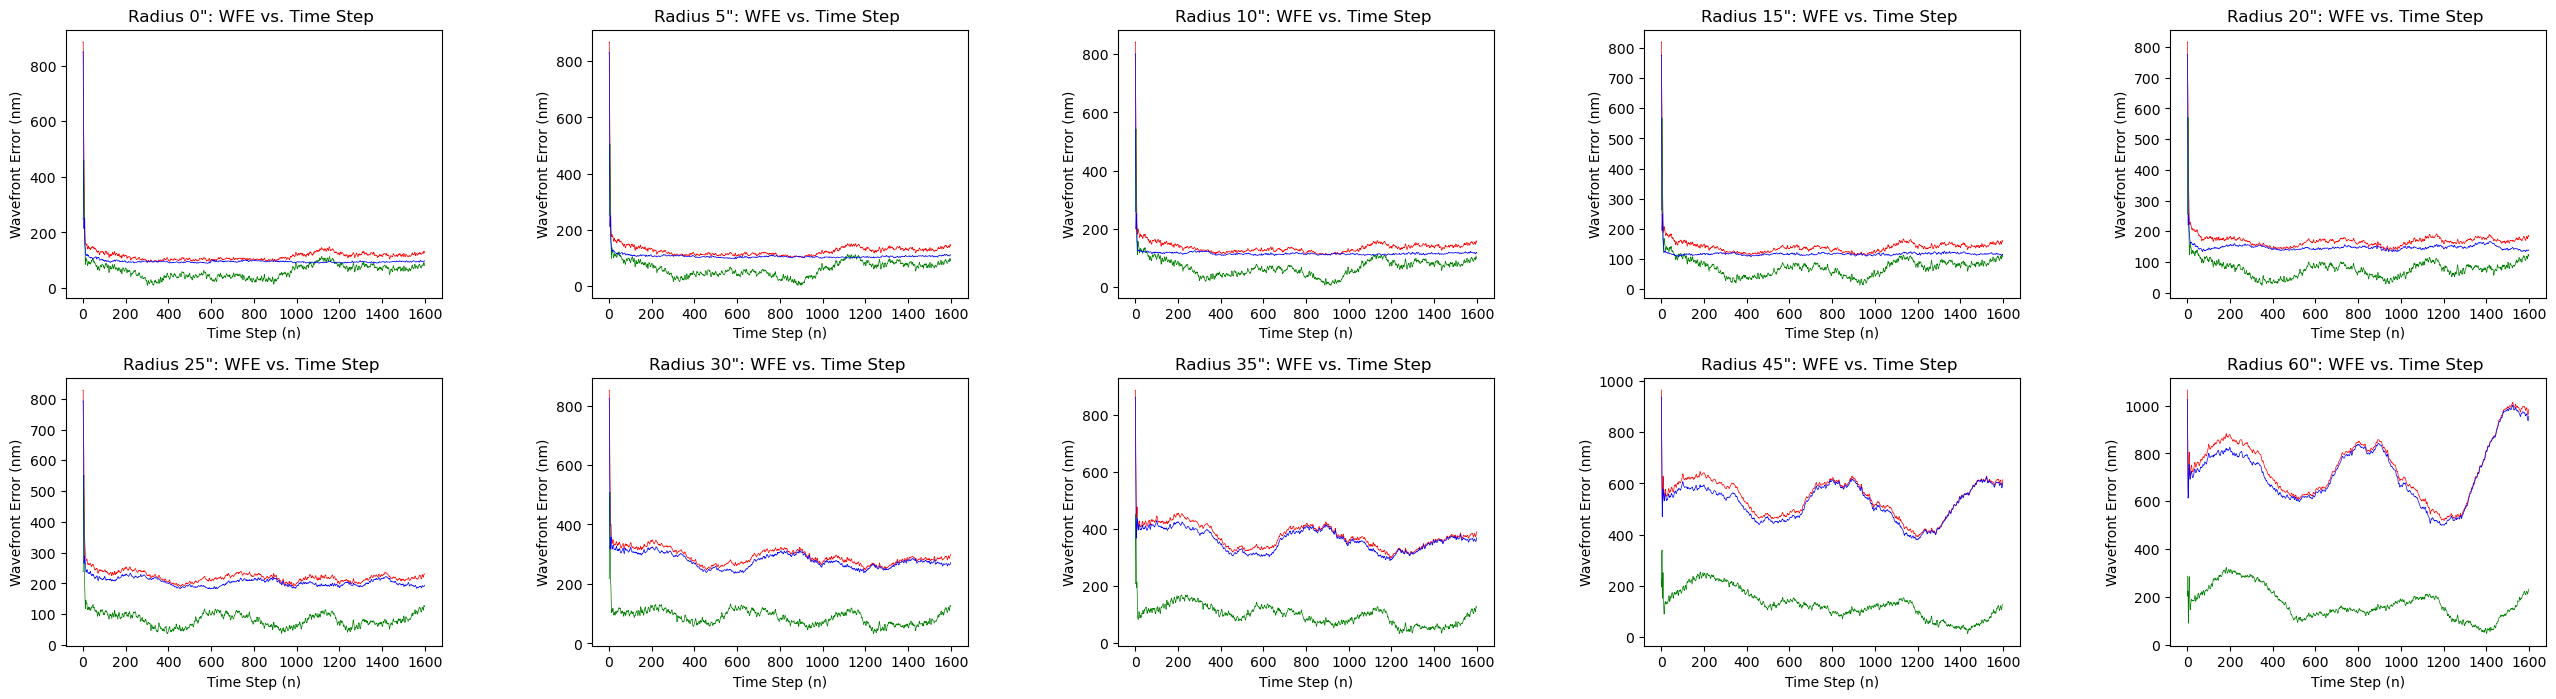

In [32]:
#Plotting
fig, ax = plt.subplots(2, n_psf // 2, figsize= (32,8), gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

for i in range(n_psf):
    row_index = i // (n_psf // 2)
    col_index = (i % (n_psf // 2))
    clos_psf_results = results_xx[3][i]
    for j in range(clos_psf_results.shape[1]):
        ax[row_index,col_index].plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        ax[row_index,col_index].set_xlabel('Time Step (n)')
        ax[row_index,col_index].set_ylabel('Wavefront Error (nm)')
        ax[row_index,col_index].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

plt.savefig('../actuator_4000_wfe_3.png', bbox_inches='tight', transparent=True)

In [15]:
#WFE
wfe_4000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_4000, clos_mean_nm_4000, open_xx_mean_nm_4000, clos_xx_mean_nm_4000 = wfe_4000

In [16]:
os.chdir("..")

### 5000 actuators

In [17]:
os.chdir("5000actuators")

In [18]:
#PSF metrics
mets_5000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_5000, y_5000, w_5000, strehl_5000, fwhm_g_5000, fwhm_e_5000, r_ee50_5000, r_ee80_5000 = mets_5000

In [19]:
#WFE
wfe_5000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_5000, clos_mean_nm_5000, open_xx_mean_nm_5000, clos_xx_mean_nm_5000 = wfe_5000

In [20]:
os.chdir("..")

# Results

Adjusted specifically for tip-tilt guide star radius at 30" and laser guide star radius at 15".

In [21]:
# Retrive shape of data
n_wvl_2000 = x_2000.shape[1]
colors_2000 = plt.cm.jet(np.linspace(0,1,n_wvl_2000)) 

n_wvl_3000 = x_3000.shape[1]
colors_3000 = plt.cm.jet(np.linspace(0,1,n_wvl_3000)) 

n_wvl_4000 = x_4000.shape[1]
colors_4000 = plt.cm.jet(np.linspace(0,1,n_wvl_4000)) 

n_wvl_5000 = x_5000.shape[1]
colors_5000 = plt.cm.jet(np.linspace(0,1,n_wvl_5000)) 

### Radius vs. Strehl

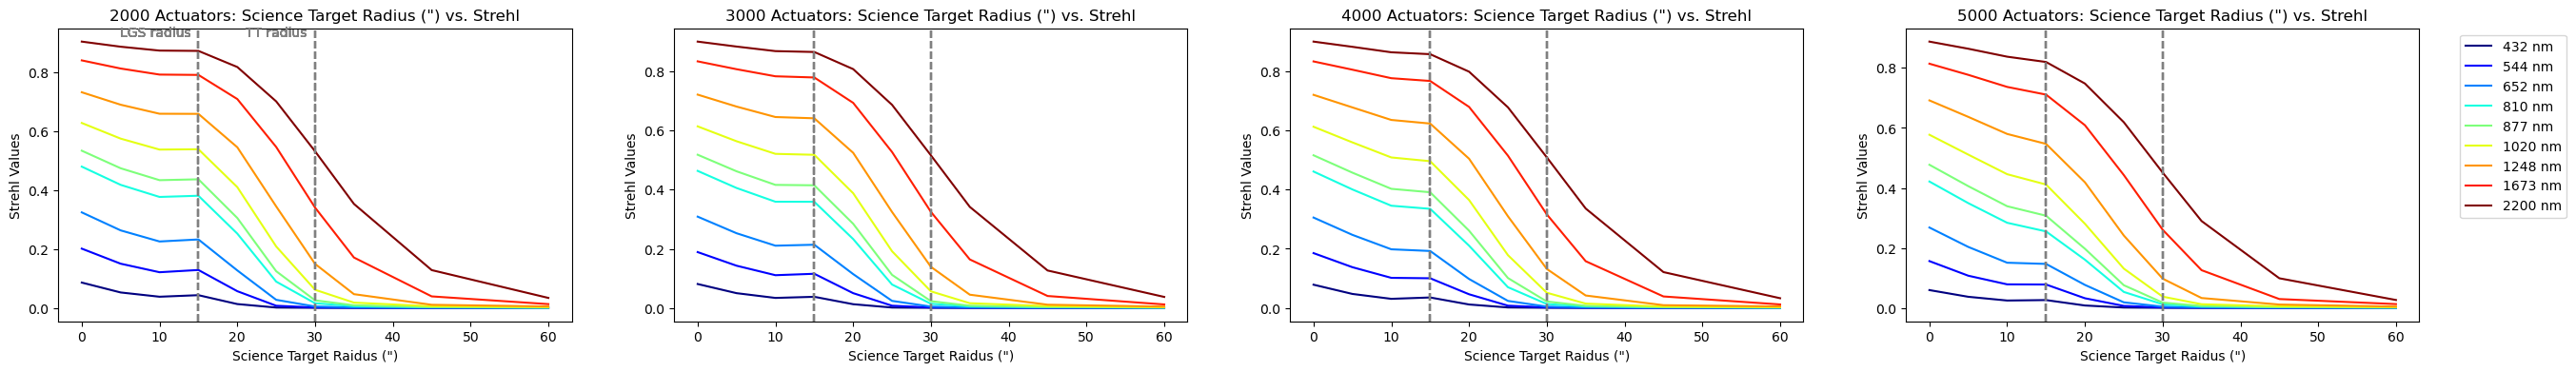

In [22]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #2000 actuarors
    ax[0].plot(x_2000[:, ww], strehl_2000[:, ww], color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. Strehl')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].set_ylabel('Strehl Values')
    ax[0].axvline(15, linestyle='--', color='grey')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(14, 0.92, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 0.92, 'TT radius', color='grey', ha='right')

    #3000 actuators
    ax[1].plot(x_3000[:, ww], strehl_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].set_ylabel('Strehl Values')
    ax[1].axvline(15, linestyle='--', color='grey')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. Strehl')

    #4000 actuators
    ax[2].plot(x_4000[:, ww], strehl_4000[:, ww], color=colors_2000[ww], label=label)
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].set_ylabel('Strehl Values')
    ax[2].axvline(15, linestyle='--', color='grey')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. Strehl')

    #5000 actuators
    ax[3].plot(x_5000[:, ww], strehl_5000[:, ww], color=colors_2000[ww], label=label)
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].set_ylabel('Strehl Values')
    ax[3].axvline(15, linestyle='--', color='grey')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. Strehl')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_strehl_3.png', bbox_inches='tight', transparent=True)

### Radius vs. FWHM

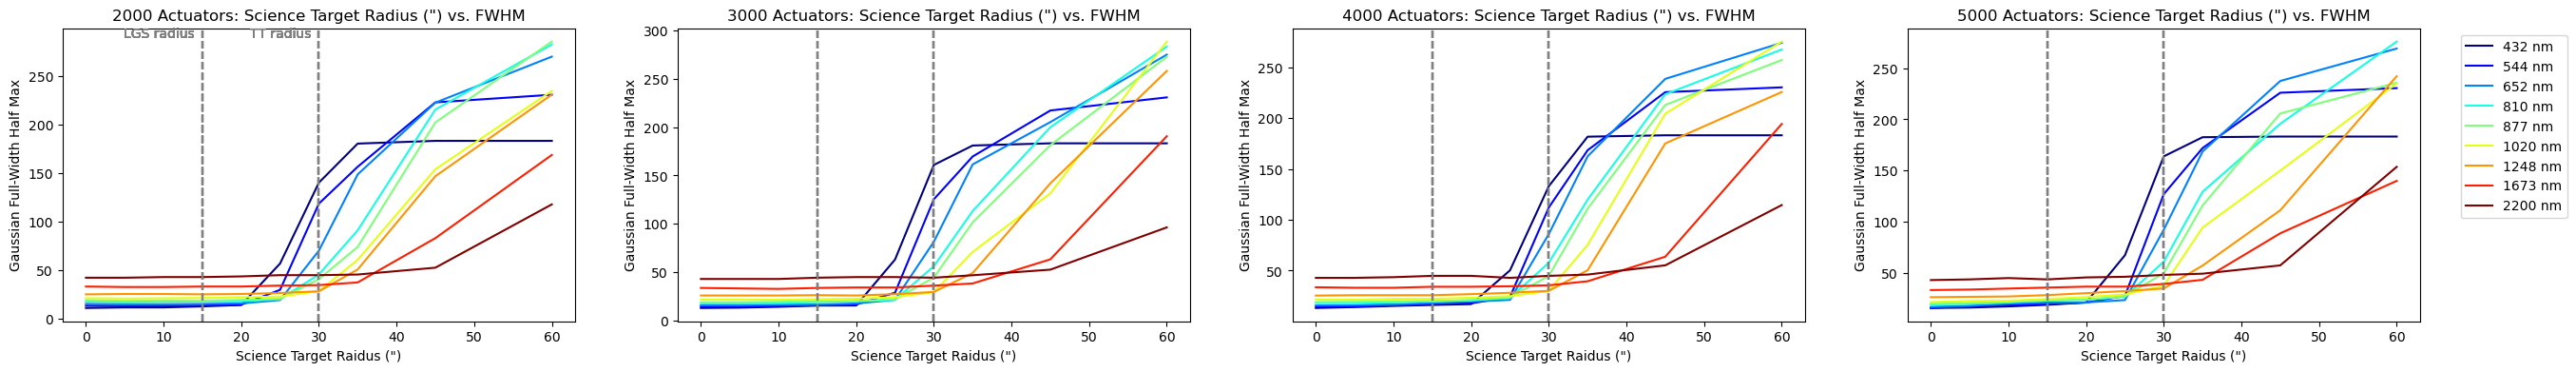

In [23]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #2000 actuarors
    ax[0].plot(x_2000[:, ww], fwhm_g_2000[:, ww], color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. FWHM')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].set_ylabel('Gaussian Full-Width Half Max')
    ax[0].axvline(15, linestyle='--', color='grey')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(14, 290, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 290, 'TT radius', color='grey', ha='right')

    #3000 actuators
    ax[1].plot(x_3000[:, ww], fwhm_g_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(15, linestyle='--', color='grey')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. FWHM')

    #4000 actuators
    ax[2].plot(x_4000[:, ww], fwhm_g_4000[:, ww], color=colors_2000[ww], label=label)
    ax[2].set_ylabel('Gaussian Full-Width Half Max')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(15, linestyle='--', color='grey')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. FWHM')

    #5000 actuators
    ax[3].plot(x_5000[:, ww], fwhm_g_5000[:, ww], color=colors_2000[ww], label=label)
    ax[3].set_ylabel('Gaussian Full-Width Half Max')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(15, linestyle='--', color='grey')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. FWHM')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
plt.savefig('actuator_fwhm_3.png', bbox_inches='tight', transparent=True)

### Radius vs. EE80

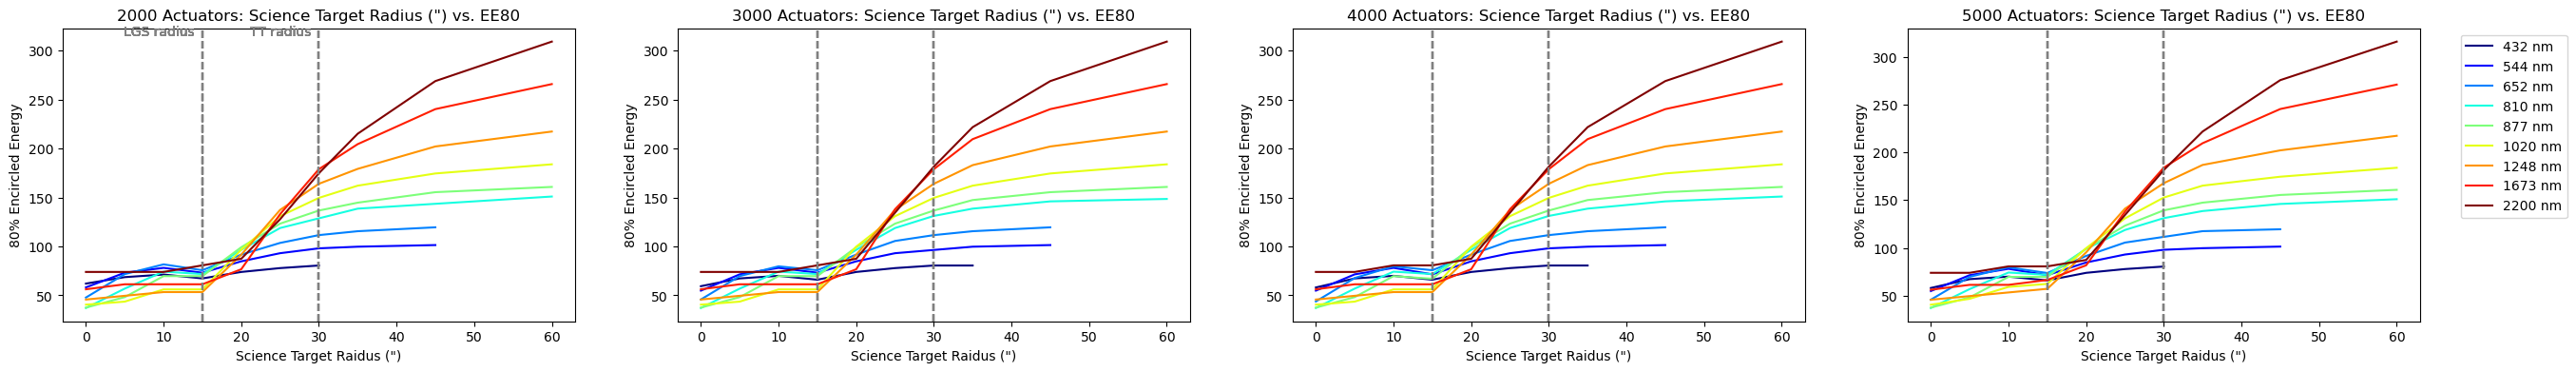

In [25]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #2000 actuarors
    ax[0].plot(x_2000[:, ww], r_ee80_2000[:, ww], color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. EE80')
    ax[0].set_ylabel('80% Encircled Energy')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].axvline(15, linestyle='--', color='grey')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(14, 315, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 315, 'TT radius', color='grey', ha='right')

    #3000 actuators
    ax[1].plot(x_3000[:, ww], r_ee80_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1].set_ylabel('80% Encircled Energy')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(15, linestyle='--', color='grey')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. EE80')

    #4000 actuators
    ax[2].plot(x_4000[:, ww], r_ee80_4000[:, ww], color=colors_2000[ww], label=label)
    ax[2].set_ylabel('80% Encircled Energy')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(15, linestyle='--', color='grey')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. EE80')

    #5000 actuators
    ax[3].plot(x_5000[:, ww], r_ee80_5000[:, ww], color=colors_2000[ww], label=label)
    ax[3].set_ylabel('80% Encircled Energy')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(15, linestyle='--', color='grey')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. EE80')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_ee80_3.png', bbox_inches='tight', transparent=True)

### Radius vs. WFE

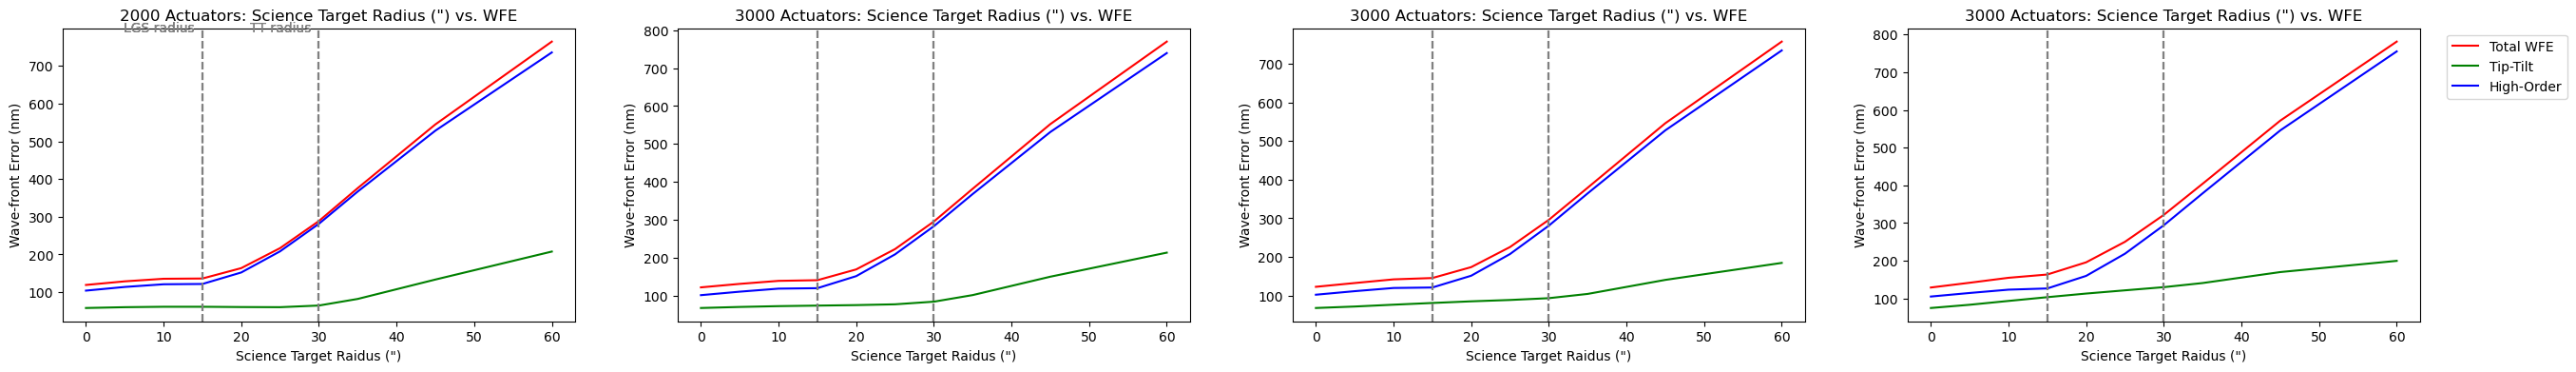

In [27]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

# Define colors for wavefront error 
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors_wfe = ["r", "g", "b"]

clos_xx_mean_nm_2000[0,0]

for i,c in enumerate(colors_wfe):
    
    #2000 actuarors
    ax[0].plot(psf_x, clos_xx_mean_nm_2000[:,i], color=colors_wfe[i])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. WFE')
    ax[0].set_ylabel('Wave-front Error (nm)')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].axvline(15, linestyle='--', color='grey')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(14, 790, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 790, 'TT radius', color='grey', ha='right')

    #3000 actuarors
    ax[1].plot(psf_x, clos_xx_mean_nm_3000[:,i], color=colors_wfe[i])
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[1].set_ylabel('Wave-front Error (nm)')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(15, linestyle='--', color='grey')
    ax[1].axvline(30, linestyle='--', color='grey')

    #4000 actuarors
    ax[2].plot(psf_x, clos_xx_mean_nm_4000[:,i], color=colors_wfe[i])
    ax[2].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[2].set_ylabel('Wave-front Error (nm)')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(15, linestyle='--', color='grey')
    ax[2].axvline(30, linestyle='--', color='grey')

    #5000 actuarors
    ax[3].plot(psf_x, clos_xx_mean_nm_5000[:,i], color=colors_wfe[i], label=wfe[i])
    ax[3].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[3].set_ylabel('Wave-front Error (nm)')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(15, linestyle='--', color='grey')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_wfe_3.png', bbox_inches='tight', transparent=True)

### Actuator vs. PSF Metrics (1000 nm) and WFE (center)

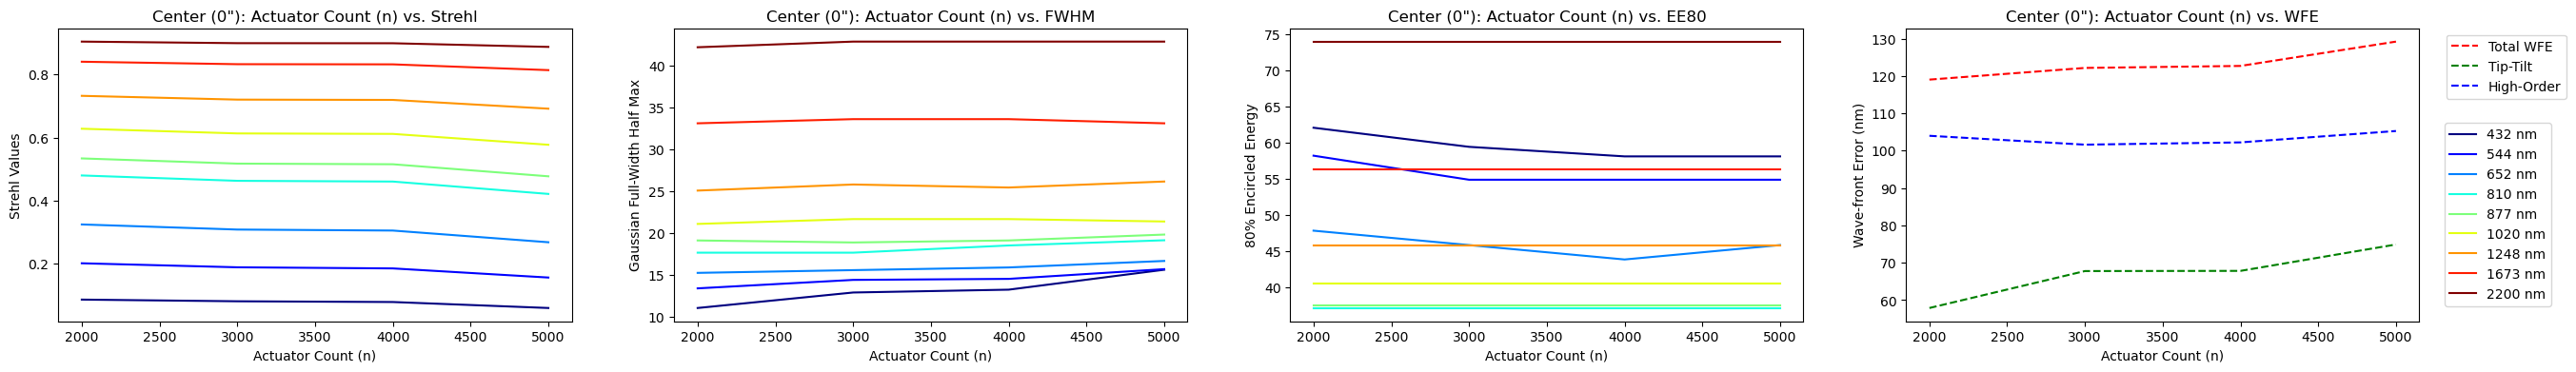

In [28]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

#Create separate lists
act_strehls = []
act_fwhm = []
act_ee80 = []
act_wfe = []

actuator = [2000, 3000, 4000, 5000]
wfe_colors = ["r", "g", "b"]
wfe_labels = ["Total WFE", "Tip-Tilt", "High-Order"]

for strehl2000, strehl3000, strehl4000, strehl5000 in zip(strehl_2000[0], strehl_3000[0], strehl_4000[0], strehl_5000[0]):
    act_strehls.append([strehl2000, strehl3000, strehl4000, strehl5000])

for fwhm2000, fwhm3000, fwhm4000, fwhm5000 in zip(fwhm_g_2000[0], fwhm_g_3000[0], fwhm_g_4000[0], fwhm_g_5000[0]):
    act_fwhm.append([fwhm2000, fwhm3000, fwhm4000, fwhm5000])

for ee802000, ee803000, ee804000, ee805000 in zip(r_ee80_2000[0], r_ee80_3000[0], r_ee80_4000[0], r_ee80_5000[0]):
    act_ee80.append([ee802000, ee803000, ee804000, ee805000])

for wfe2000, wfe3000, wfe4000, wfe5000 in zip(clos_xx_mean_nm_2000[0], clos_xx_mean_nm_3000[0], clos_xx_mean_nm_4000[0], clos_xx_mean_nm_5000[0]):
    act_wfe.append([wfe2000, wfe3000, wfe4000, wfe5000])

n_wvls = len(act_strehls)
colors = plt.cm.jet(np.linspace(0, 1, n_wvls))

n_wfe = len(act_wfe)

for col_idx in range(n_wvls):
    labels_psf = f'{w_2000[0, col_idx]*1e3:3.0f} nm'
    
    ax[0].plot(actuator, act_strehls[col_idx], label=labels_psf, color=colors[col_idx])
    ax[0].set_title('Center (0"): Actuator Count (n) vs. Strehl')
    ax[0].set_xlabel('Actuator Count (n)')
    ax[0].set_ylabel('Strehl Values')
    
    ax[1].plot(actuator, act_fwhm[col_idx], label=labels_psf, color=colors[col_idx])
    ax[1].set_title('Center (0"): Actuator Count (n) vs. FWHM')
    ax[1].set_xlabel('Actuator Count (n)')
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    
    ax[2].plot(actuator, act_ee80[col_idx], label=labels_psf, color=colors[col_idx])
    ax[2].set_title('Center (0"): Actuator Count (n) vs. EE80')
    ax[2].set_xlabel('Actuator Count (n)')
    ax[2].set_ylabel('80% Encircled Energy')

for col_idx in range(n_wfe):
    labels_wfe = f'{wfe_labels[col_idx]}' 

    ax[3].plot(actuator, act_wfe[col_idx], label=wfe_labels[col_idx], color=wfe_colors[col_idx], linestyle='dashed')
    ax[3].set_title('Center (0"): Actuator Count (n) vs. WFE')
    ax[3].set_xlabel('Actuator Count (n)')
    ax[3].set_ylabel('Wave-front Error (nm)')

ax[2].legend(loc='upper right', bbox_to_anchor=(2.47, .7))
ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_psf_wfe_3.png', bbox_inches='tight', transparent=True)

In [12]:
from paarti.utils import maos_utils
from bpeck.mcao import act_study
from bpeck.mcao import utils
import math
import importlib

In [25]:
importlib.reload(act_study)

<module 'bpeck.mcao.act_study' from '/u/bpeck/code/bpeck/bpeck/mcao/act_study.py'>

In [28]:
utils.tt_mag_to_flux(2000, 3000, 1000, 7, 8)
utils.tt_flux_params(2000, 3000, 1000, 7, 8)

([42387.592], [1.056], [0.269])

In [29]:
maos_utils.keck_nea_photons_any_config(wfs='LGSWFS-OCAM2K', 
                                       side=0.218, 
                                       throughput=0.36 * 0.88 , 
                                       ps=1, 
                                       theta_beta=1.5 *(math.pi/180)/(60*60), 
                                       band='R', 
                                       sigma_e=0.5, 
                                       pix_per_ap=25, 
                                       time=1/1500, 
                                       m=7)
maos_utils.keck_nea_photons(m=8,
                            wfs='LBWFS',
                            wfs_int_time=1/1500)
maos_utils.keck_nea_photons(m=8,
                            wfs='TRICK-H',
                            wfs_int_time=1/1500)

(204.66711458204227, 0.2687290535771581, 42387.5924582084, 1.0557017728300258)

In [27]:
act_study.print_mag_to_flux(2000, 3000, 1000, 7, 8)

[41.558] [0.001] [202.516]
--------------------
VisMCAO Magnitude-to-Flux Parameters:
--------------------

####
#7mag LGS (8mag TT)
####
#Actuator Count: 2000
#dm.dx = [ 0.218 .168 .168 ]
#powfs.siglev = [ 165.278 42387.592 41.558 ]
#powfs.bkgrnd = [ 0.1 1.056 0.001 ]
#powfs.nearecon = [ 118.869 0.269 202.516 ]

